# Chapter 8. Dimensionality Reduction

In [153]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(0)

plt.style.use('seaborn-whitegrid')

In [154]:
%matplotlib inline

In [155]:
%load_ext ipycache

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


We will consider two main approaches of dimensionality reduction, *project* and *manifold learning*, by learning about **PCA**, **kernel PCA**, and **LLE**.

## The curse of dimensionality

As the number of dimensions grow, the volume grows exponentially.
Therefore, high-dimension data sets will be relatively sparse with most data points being very far away from each other.
This could easily result in overfitting.
Assuming even distribution, the number of training instances required to reach a given density grows exponentially wit the number of dimensions.

## Main approaches for dimensionality reduction

### Projection

In real data sets, the training instances are not evenly distributed throughout the feature space, instead some features contain greater variability than others.
Thus, the training instances lie within a subspace of the feature space.
The number of dimensions can be reduced if the subspace is identified and the data points are projected onto it.

### Manifold learning

A $d$-dimensional manifold is a part of an $n$-dimensional space (where $d<n$)that locally resembles a $d$-dimensional hyperplane.
The *manifold assumption* states that most real-world high-dimensional datasets lie close to a lower-dimensional manifold.

## Principal Component Analysis (PCA)

PCA rotates the axes such that they contain the most variance in the data.
*Singular Value Decomposition* is used to identify these new "principal components."
Below is an example of manually using SVD to find the principal component vectors and project the original data onto the new axes.

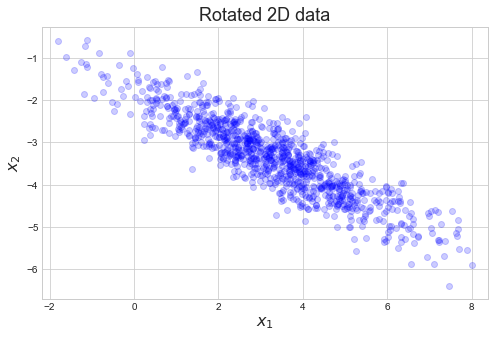

In [156]:
n=1000
X = np.array((
    (np.random.randn(n) * 2) + 5,
    (np.random.randn(n) * 0.5) - 2
)).T

# Rotated by 30 degrees
rot = np.pi * 30 / 180
X[:, 0] = X[:, 0] * np.cos(rot) + X[:, 1] * np.sin(rot)
X[:, 1] = X[:, 1] * np.cos(rot) - X[:, 0] * np.sin(rot)

fig = plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.2)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.title('Rotated 2D data', fontsize=18)
plt.axis('equal')
plt.show()

In [157]:
# The data must be centered before SVD.
X_centered = X - X.mean(axis=0)

# SVD of centered data.
U, s, Vt = np.linalg.svd(X_centered)

# First two components.
c1, c2 = Vt.T[:, 0], Vt.T[:, 0]

print(f'compoent 1: {np.round(c1[0], 4)}, {np.round(c1[0], 4)}')
print(f'compoent 2: {np.round(c1[1], 4)}, {np.round(c1[1], 4)}')

compoent 1: -0.8955, -0.8955
compoent 2: 0.445, 0.445


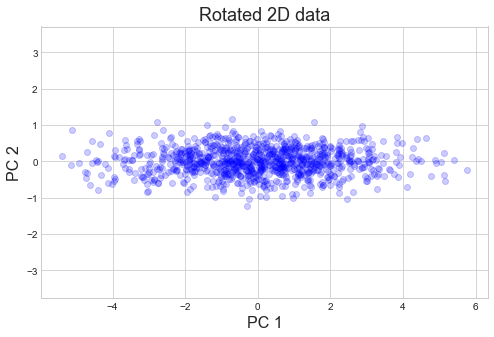

In [158]:
# Project the data onto the PCs.
X_2d = X_centered.dot(Vt.T)

fig = plt.figure(figsize=(8, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], color='blue', alpha=0.2)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
plt.title('Rotated 2D data', fontsize=18)
plt.axis('equal')
plt.show()

There is also a use `PCA` class in Scikit-Learn.

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

The `pca` object holds relevant information including the components and the amount of variance they each explain.

In [160]:
pca.components_.T

array([[-0.89551871,  0.44502386],
       [ 0.44502386,  0.89551871]])

In [161]:
pca.explained_variance_ratio_

array([0.96291648, 0.03708352])

In [162]:
pca.mean_

array([ 3.25514434, -3.35372667])

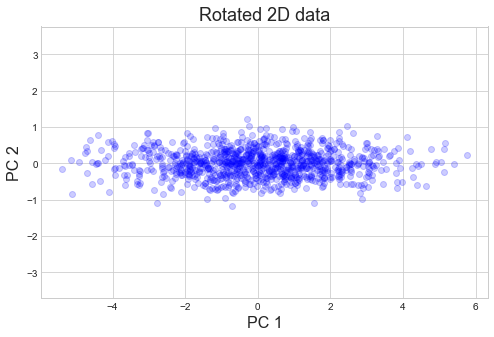

In [163]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1], color='blue', alpha=0.2)
plt.xlabel('PC 1', fontsize=16)
plt.ylabel('PC 2', fontsize=16)
plt.title('Rotated 2D data', fontsize=18)
plt.axis('equal')
plt.show()

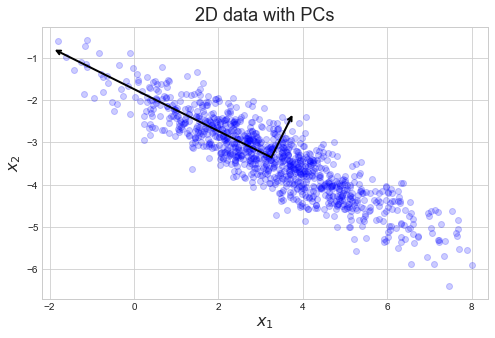

In [164]:
arrowprops = {
    'arrowstyle': '->',
    'linewidth': 2,
    'shrinkA': 0, 
    'shrinkB': 0
}

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
fig = plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.title('2D data with PCs', fontsize=18)
plt.axis('equal')
plt.show()

### Choosing the right number of dimensions

Instead of choosing an arbitrary number of dimensions from the PCA, it can be best to select the top dimensions that explain a certain amount of the variance.
This can be done automatically by setting the `n_components` parameter of a `PCA` object to a value less than 1.
An example is shown below with the digits data from Scikit-Learn.

In [165]:
from sklearn.datasets import load_digits

digits = load_digits()

# The data is in 96-dimensional space.
print(f' digits data dimensionality: {digits.data.shape[1]}')

 digits data dimensionality: 64


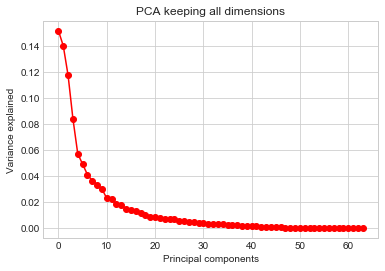

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    random_state=0)

pca = PCA()
pca.fit(X_train)

plt.plot(pca.explained_variance_ratio_, 'r-o')
plt.xlabel('Principal components')
plt.ylabel('Variance explained')
plt.title('PCA keeping all dimensions')
plt.show()

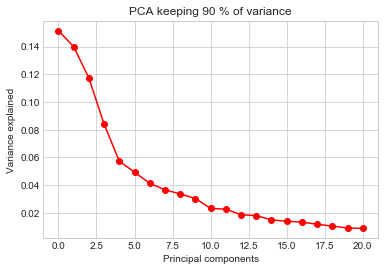

In [167]:
pca = PCA(n_components=0.9)
pca.fit(X_train)

plt.plot(pca.explained_variance_ratio_, 'r-o')
plt.xlabel('Principal components')
plt.ylabel('Variance explained')
plt.title('PCA keeping 90 % of variance')
plt.show()

In [168]:
X_reduced = pca.transform(X_train)
print(f'reduced digit data dimensionality: {X_reduced.shape[1]}')

reduced digit data dimensionality: 21


### PCA for compression

PCA can be used for compression by only keeping the new dimensions from PCA.
The original data can be reconstituted by applying the inverse transformation of the PCA projection.
Of course, this is a lossy compression, though the most important features should be maintained.
An example is shown below on the MNIST data.

In [169]:
%%cache -d caches ch08_load_mnist.pkl X, y, X_train, X_test, y_train, y_test

from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=10000,
                                                    random_state=0)

[Skipped the cell's code and loaded variables X, X_test, X_train, y, y_test, y_train from file '/Users/admin/Developer/Python/100DaysOfPython/HandsOnMachineLearningWithScikitLearnAndTensorFlow/caches/ch08_load_mnist.pkl'.]


In [170]:
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape

(60000, 87)

In [171]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

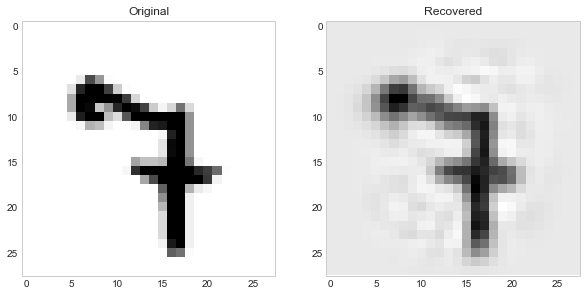

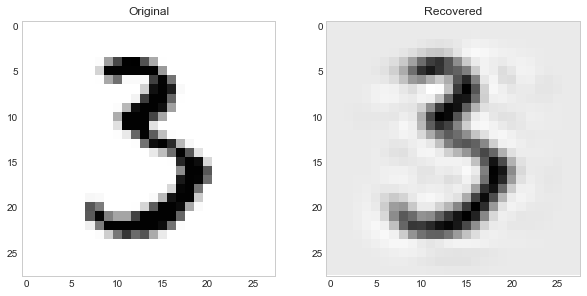

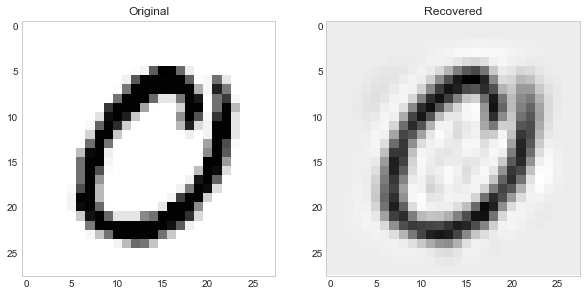

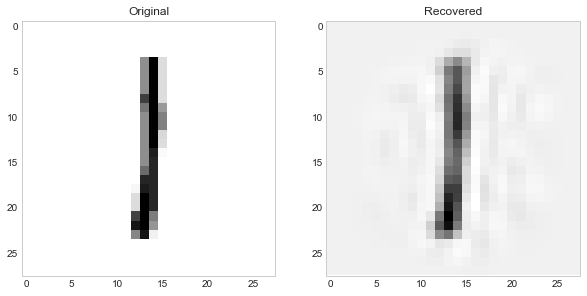

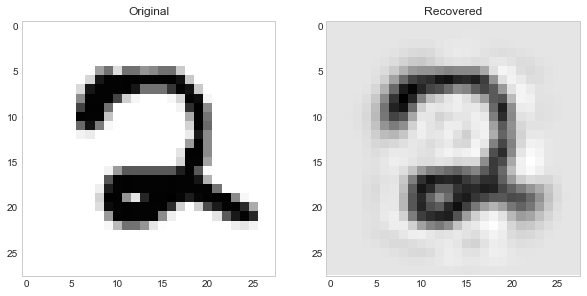

In [172]:
def plot_digit(x, title=None, axis=None):
    ax = axis or plt.gca()
    ax.grid(False)
    plt.axis('equal')
    img = x.reshape((28, 28))
    plt.title(title)
    plt.imshow(img)

for i in range(5):
    fig = plt.figure(figsize=(10, 4.7))

    ax1 = plt.subplot(1, 2, 1)
    plot_digit(X_train[i, :], title="Original")


    ax2 = plt.subplot(1, 2, 2)
    ax2.grid(False)
    plot_digit(X_recovered[i, :], title="Recovered")

    plt.show()

### Randomized  PCA

Scikit-Learn's `PCA` module can use a stochaistic algorithm, *Randomized PCA* to approximate the first $d$ principal components.
This can be used in place of SVD by setting the `svd_solver` parameter to `'randomized'`; by default, this parameter is set to `'auto'` and this approximation is used when there are more than 500 original dimensions.

### Incremental PCA

*Incremental PCA* is an algorithm that does PCA on the data in batches.
It is useful in cases where the entire data set is too large to hold  in memory or with "on-the-fly" learning where new data instances are continuously coming in.

In [173]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=100)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

inc_pca.components_.shape

(100, 784)

### Kernel PCA

A *kernel* (covered in Chapter 5 on SVM) is a mathematical technique that maps instances into a higher dimensional *feature space*.
Then, the separation of the instances is greater, allowing for nonlinear classification and regression relative to the original space.
*Kernel PCA* iss  often good for preserving clusters after the dimensionality reduction or unrolling datasets that lie close to a complex manifold.

Below is an example with the famous "swiss roll."

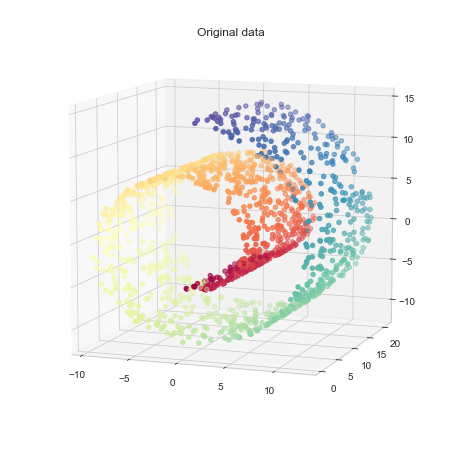

In [174]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, color = make_swiss_roll(1500)


fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
plt.show()

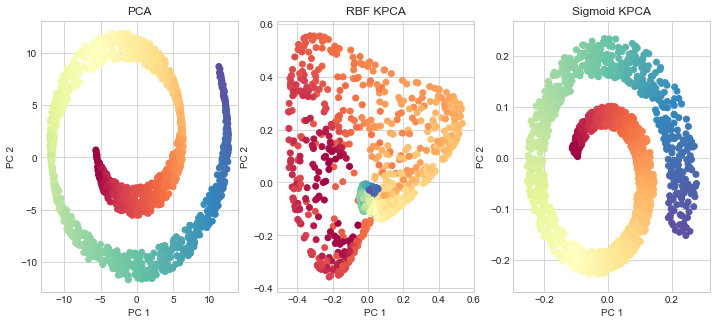

In [175]:
from sklearn.decomposition import KernelPCA

def plot_swiss_roll_pca(X_reduced, title=None):
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(title)

pca = PCA(n_components=2)
rbf_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.07)
sigmoid_kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1)

pca_names = ('PCA', 'RBF KPCA', 'Sigmoid KPCA')

fig = plt.figure(figsize=(12, 5))
subplot_counter = 1

for pca_obj, name in zip((pca, rbf_kpca, sigmoid_kpca), pca_names):
    X_reduced = pca_obj.fit_transform(X)
    plt.subplot(1, 3, subplot_counter)
    plot_swiss_roll_pca(X_reduced, name)
    subplot_counter += 1

plt.show()

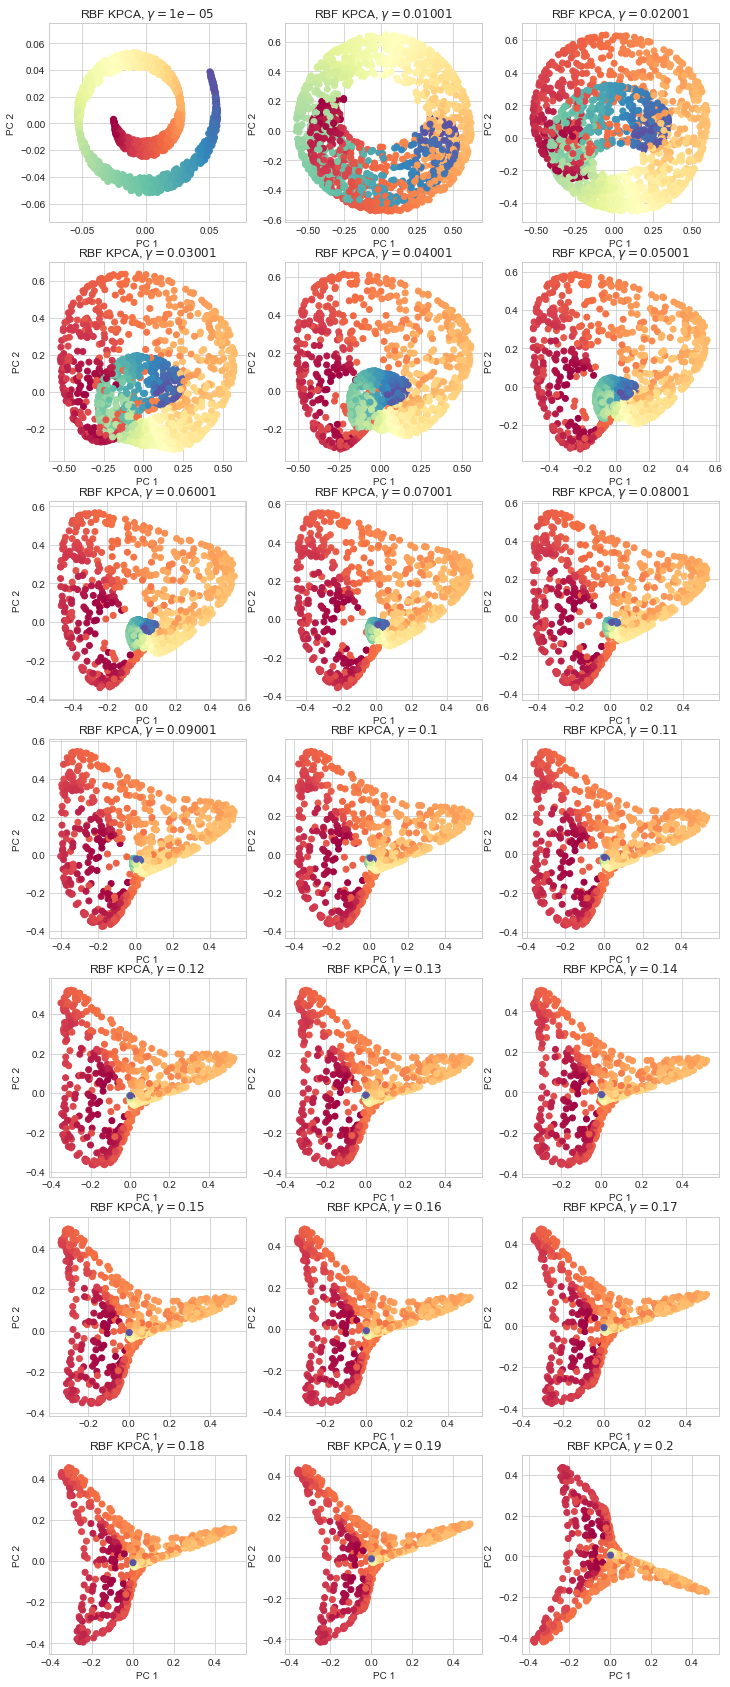

In [176]:
fig = plt.figure(figsize=(12, 30))
subplot_counter = 1

for g in np.linspace(0.00001, 0.2, 21):
    pca = KernelPCA(n_components=2, kernel='rbf', gamma=g)
    X_reduced = pca.fit_transform(X)
    plt.subplot(7, 3, subplot_counter)
    name = f'RBF KPCA, $\gamma = {np.round(g, 5)}$'
    plot_swiss_roll_pca(X_reduced, name)
    subplot_counter += 1

### Selecting a kernel and  tuning hyperparameters

Since PCA is an unsupervised learning method, there is no obvious value to optimize for.
However, since it is usually a step in a classifier or regressor, the hyperparamters can be included in a grid search over a pipeline.
Below is an example trying to use linear regression to predict the `color` values for the points in the swiss roll.

In [177]:
%%cache -d caches ch08_kpca_gridsearch.pkl reg_pipeline, param_grid, grid_search

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

reg_pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('linear_reg', LinearRegression())
])

param_grid = {
    'kpca__gamma': np.arange(0.01, 1, 0.005),
    'kpca__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
}

grid_search = GridSearchCV(reg_pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X, color)

[Skipped the cell's code and loaded variables grid_search, param_grid, reg_pipeline from file '/Users/admin/Developer/Python/100DaysOfPython/HandsOnMachineLearningWithScikitLearnAndTensorFlow/caches/ch08_kpca_gridsearch.pkl'.]


In [178]:
grid_search.best_params_

{'kpca__gamma': 0.06499999999999999, 'kpca__kernel': 'rbf'}

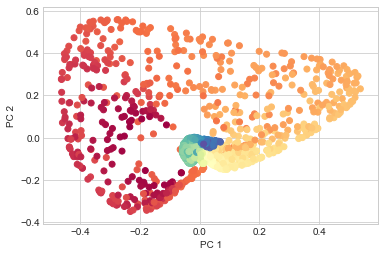

In [179]:
best_kpca = grid_search.best_estimator_.named_steps['kpca']
X_reduced = best_kpca.transform(X)
plot_swiss_roll_pca(X_reduced)

The hyperparamters of a KPCA model can also be tuned by selecting the kernel and additional parameters based on which has the lowest reconstruction error.
This process is shown below.

In [180]:
from sklearn.metrics import mean_squared_error


def fit_rbf_kpca(gamma):
    rbf_kpca = KernelPCA(n_components=2,
                         kernel='rbf',
                         gamma=gamma,
                         fit_inverse_transform=True)
    X_reduced = rbf_kpca.fit_transform(X)
    X_recovered = rbf_kpca.inverse_transform(X_reduced)
    return rbf_kpca, mean_squared_error(X, X_recovered)

In [181]:
%%cache -d caches ch08_kpca_bestgamma.pkl gammas, mses

gammas = np.arange(0.00001, 0.1, 0.0005)
mses = list()
for g in gammas:
    _, mse = fit_rbf_kpca(g)
    mses.append(mse)

[Skipped the cell's code and loaded variables gammas, mses from file '/Users/admin/Developer/Python/100DaysOfPython/HandsOnMachineLearningWithScikitLearnAndTensorFlow/caches/ch08_kpca_bestgamma.pkl'.]


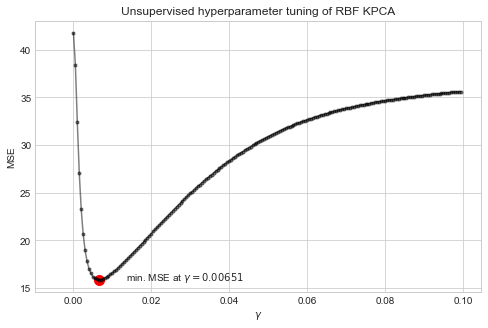

In [182]:
min_mse_idx = np.argmin(mses)
min_gamma = gammas[min_mse_idx]
min_mse = mses[min_mse_idx]

fig = plt.figure(figsize=(8, 5))

plt.scatter(min_gamma, min_mse, color='r', s=100)
plt.text(min_gamma+0.007, min_mse, f'min. MSE at $\gamma = {min_gamma}$')

plt.plot(gammas, mses, 'k-o', alpha=0.5, ms=3)
plt.xlabel('$\gamma$')
plt.ylabel('MSE')
plt.title('Unsupervised hyperparameter tuning of RBF KPCA')

plt.show()

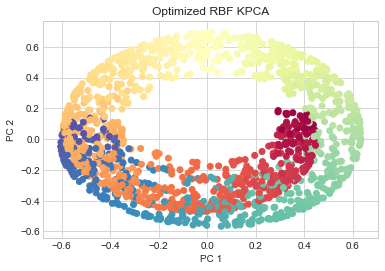

In [183]:
best_rbf_kpca, mse = fit_rbf_kpca(min_gamma)
X_reduced = best_rbf_kpca.transform(X)
plot_swiss_roll_pca(X_reduced, title='Optimized RBF KPCA')

## Local Linear Embedding (LLE)

LLE is a nonlinear dimensionality reduction technique that uses a manifold learning technique.
Basically, it tries to preserve the relationship between each data point and its neighbors in lower dimensions.
The details of the two-step optimization problem used for LLE is described in more detail in the book.

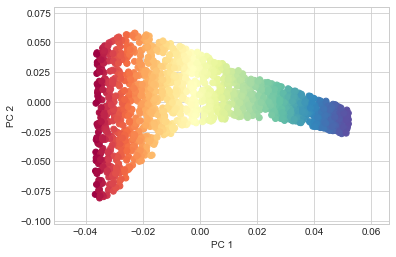

In [184]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_reduced = lle.fit_transform(X)
plot_swiss_roll_pca(X_reduced)

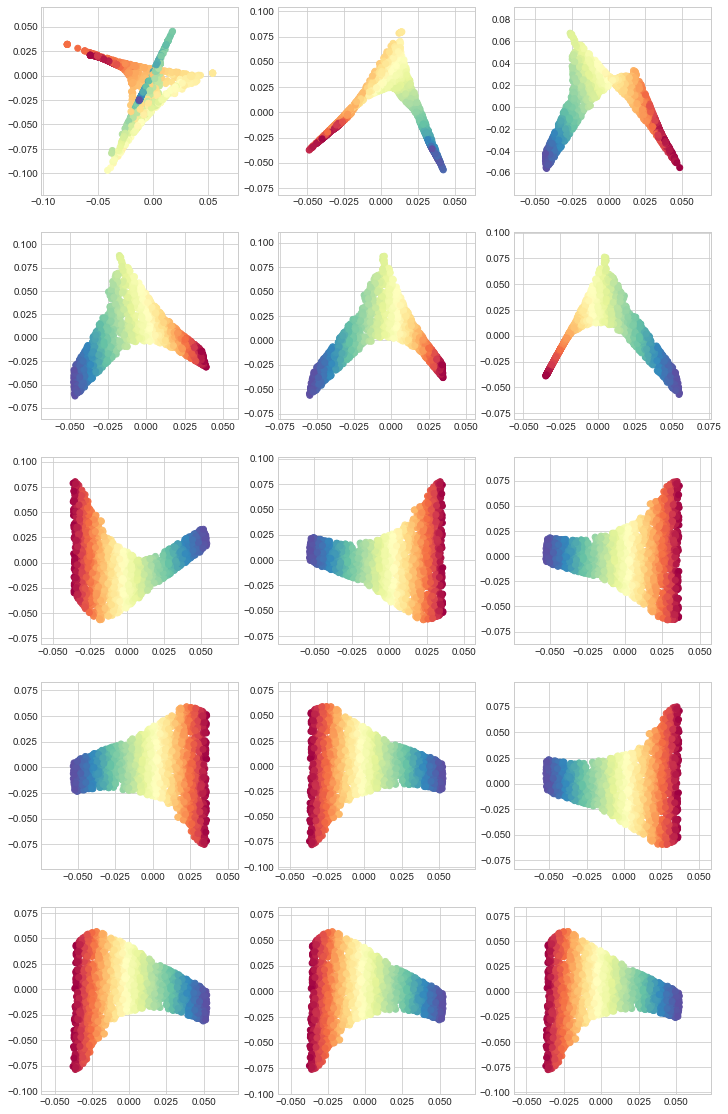

In [185]:
fig = plt.figure(figsize=(12, 20))
subplot_counter = 1
for n_neighbors in np.arange(5, 20, 1):
    plt.subplot(5, 3, subplot_counter)
    subplot_counter += 1
    
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors)
    X_reduced = lle.fit_transform(X)
    plot_swiss_roll_pca(X_reduced)
    plt.xlabel(None)
    plt.ylabel(None)

## Additional dimensionality reduction techniques

### Random projections

This method projects the data to a lower-dimensional space using a random linear projection.
Surprisingly, it does a very good job of preserving local relations.


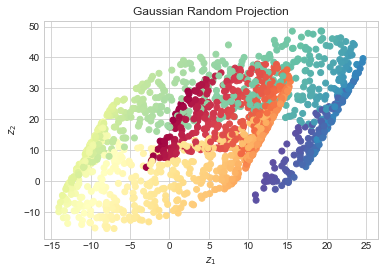

In [186]:
from sklearn.random_projection import GaussianRandomProjection

# Reduce the swiss-roll data by random projection.
random_projection = GaussianRandomProjection(n_components=2, random_state=0)
X_reduced = random_projection.fit_transform(X)
plot_swiss_roll_pca(X_reduced)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.title('Gaussian Random Projection')
plt.show()

### Multidimensional scaling (MDS)

MDS reduces dimensionality while trying to preserve the distances between the instances.


### Isomap

Isomap creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the geodesic distances (number of nodes in the shortest path).


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE reduces dimensionality while trying to keep simillar instances close and dissimilar instances apart.
It is generally used for visualizing higher-dimensional data in 2D.

[Skipped the cell's code and loaded variables transformers from file '/Users/admin/Developer/Python/100DaysOfPython/HandsOnMachineLearningWithScikitLearnAndTensorFlow/caches/ch08_other_dimreducts.pkl'.]


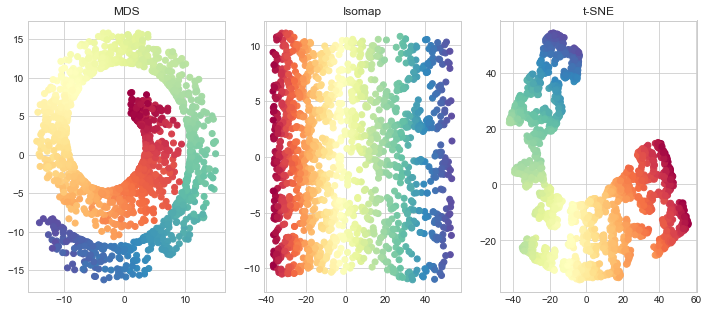

In [187]:
%%cache -d caches ch08_other_dimreducts.pkl transformers

from sklearn.manifold import MDS, Isomap, TSNE

# Several transformers to iterate through.
transformers = [
    ('MDS', MDS(n_components=2)),
    ('Isomap', Isomap(n_neighbors=20, n_components=2)),
    ('t-SNE', TSNE(n_components=2)),
]

fig = plt.figure(figsize=(12, 5))
subplot_counter = 1

# Get reduced data for each transformer and plot.
for name, transformer in transformers:
    plt.subplot(1, 3, subplot_counter)
    subplot_counter += 1
    
    X_reduced = transformer.fit_transform(X)
    
    plot_swiss_roll_pca(X_reduced)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(name)
    
plt.show()

### Linear Discriminant Analysis (LDA)

LDA is a classification algorithm that tries to find the axes of best separation between the classes (because of this, it is often compared to PCA).
These new axes can be projected onto, maintaining separation between the classes.

/opt/anaconda3/envs/daysOfCode-env/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


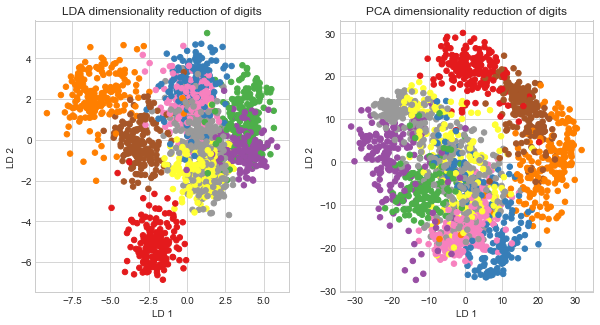

In [188]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline for reducing the digits data using LDA.
digit_lda = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
])

# The reduced data from LDA.
lda_reduced = digit_lda.fit_transform(digits.data, digits.target)

# For comparison, the digits were reduced by PCA, too.
digit_pca = PCA(n_components=2)
pca_reduced = digit_pca.fit_transform(digits.data)


# Plotting:

fig = plt.figure(figsize=(10, 5))

# Plot LDA-reduced data.
plt.subplot(1, 2, 1)
plt.scatter(lda_reduced[:, 0], lda_reduced[:, 1],
            c=digits.target, s=30, cmap='Set1')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('LDA dimensionality reduction of digits')

# Plot the PCA reduced data.
plt.subplot(1, 2, 2)
plt.scatter(pca_reduced[:, 0], pca_reduced[:, 1],
            c=digits.target, s=30, cmap='Set1')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('PCA dimensionality reduction of digits')

plt.show()

The following is an example of paring LDA with t-SNE.
LDA finds the best separation of the data into 10 pieces (9 components) and then t-SNE reduces it to 2 dimensions for visualization of the separation in 9D.

/opt/anaconda3/envs/daysOfCode-env/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


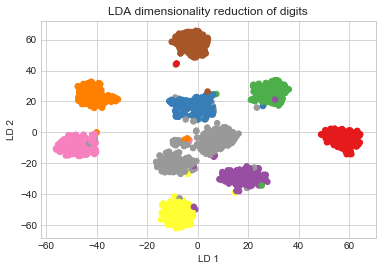

In [189]:
# Pipeline of LDA to 5 components and t-SNE to 2 components.
digit_lda = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=9)),
    ('tsne', TSNE(n_components=2))
])
X_reduced = digit_lda.fit_transform(digits.data, digits.target)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=digits.target, s=30, cmap='Set1')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('LDA dimensionality reduction of digits')
plt.show()

## Exercises

**Exercise 9.** Compare the results of a decision forest on the MNIST data with and without dimensionality reduction.

In [190]:
%%cache -d caches ch08_exercise8.pkl X, y, X_train, X_test, y_train, y_test, rf_clf, rf_pca_clf

from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Load MNIST data and split into train and test datasets.
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=10000,
                                                    random_state=0)


# A random forest with direct input from MNIST.
rf_clf = RandomForestClassifier(max_depth=2, n_estimators=500)
rf_clf.fit(X_train, y_train)


# The same random forest, but the data is preprocessed by PCA
rf_pca_clf = Pipeline([
    ('PCA', PCA(n_components=0.95)),
    ('random_forest', RandomForestClassifier(max_depth=2, n_estimators=500))
])
rf_pca_clf.fit(X_train, y_train)


# Assess accuracy with the test data.
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))
rf_pca_acc = accuracy_score(y_test, rf_pca_clf.predict(X_test))

print(f'accuracy of RF: {np.round(rf_acc, 3)}')
print(f'accuracy of PCA-RF: {np.round(rf_pca_acc, 3)}')

[Saved variables 'X, X_test, X_train, rf_clf, rf_pca_clf, y, y_test, y_train' to file '/Users/admin/Developer/Python/100DaysOfPython/HandsOnMachineLearningWithScikitLearnAndTensorFlow/caches/ch08_exercise8.pkl'.]
accuracy of RF: 0.651
accuracy of PCA-RF: 0.697


Though the performance of each random forest was rather poor and would benefit from further optimization, just adding PCA increased the accuracy substantially.
This is likely from both a reduction in feature space and also noise from less-important features.